In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 1)  Intrduction

In this notebook we will take look at 'athlete_event.csv' and 'noc_regions.csv' files. You can find there information about winners of Olympic Games in this and past century. First let's read both files into DataFrames and take look at the data. 

In [2]:
countries = pd.read_csv('csv/noc_regions.csv')
countries.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [3]:
athletes = pd.read_csv('csv/athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


As you can see, in athletes DataFrame you can find who won what medal in what discipline in what year. Let's also see what sports are in the table.

In [4]:
athletes['Sport'].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

As you can see there are 60 different sports in the DataFrame. Now, let's add country columns to the athlete dataframe. Let's also replace NaN float values with 'None' string, so we have only strings in "Medal" column.

In [5]:
athletes['Country'] = athletes['NOC'].replace(to_replace = countries['NOC'].to_list(), value=countries['region'].to_list())
athletes[['Medal']] = athletes[['Medal']].fillna(value='None')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


Now. Let's write a function that returns how many medal in given discipline in given years each country won. We will use that function later.

In [6]:
def get_medals_number(athletes_df: pd.DataFrame, sport: str, year_min: int, year_max: int):
    """
Extracts and counts the number of medals won by athletes in a specific sport within a given time range.

Parameters:
- athletes_df (pd.DataFrame): A DataFrame containing information about athletes, including columns 'Sport', 'Medal', and 'Year'.
- sport (str): The name of the sport for which you want to retrieve medal counts.
- year_min (int): The minimum year of the time range to consider.
- year_max (int): The maximum year of the time range to consider.

Returns:
- pd.DataFrame: A DataFrame with two columns - 'Medal' and 'country'. It represents the count of medals
  (excluding 'None' medals) won by athletes from different countries in the specified sport and time range.
  The DataFrame is sorted in descending order of medal counts.

Example:
If you want to find the medal counts for the sport 'Swimming' between 2000 and 2010, you can call the function as follows:
get_medals_number(athletes_df, 'Swimming', 2000, 2010)

Note:
- 'Medal' column is expected to contain the medal type, where 'None' indicates no medal.
- 'Year' column is expected to contain the year when the athlete participated.
    """
    medals = athletes.loc[(athletes_df['Sport'] == sport) & (athletes_df['Medal'] != 'None') & (athletes_df['Year'].between(year_min, year_max)), ['Medal', 'Country']]
    medals = medals.groupby('Country').count().sort_values('Medal', ascending=False)
    return medals

# 2) Skiing, Mountains and Temperature
It is unlikely for countries like the Netherlands or Saudi Arabia to win a lot of medals in skiing. There are no mountains or ski resorts there. The more people ski, the more likely it is that one of them is good at this. Even if somebody has perfect genes for skiing, if he didn’t ever ski, he won’t win an Olympics medal. We expect most of the siiing medals to be won by countries with a lot of mountains and snow. Like Norway or Nepal. Is it true? Let’s check it!

First, let’s find the most mountainous countries in the world. More specifically, let’s find the 10 countries with the highest average altitude (in meters above sea level) and the 10 countries whose largest part of the national territory is covered with mountains. Then let’s show this information, along with country’s average year temperature, using barplots. Finally, let’s show with barplot what countries won the most medals in skiing, along with their average yearly temperature. Let’s see if countries in first two barplots are the same countries, what are in third barplot.

## 2.1) Temperature

Information about average temperature can be downloaded from [this site](https://www.kaggle.com/code/akshaychavan/average-temperature-per-country-per-year/input?select=GlobalLandTemperaturesByCountry.csv) Let's read the file and take a look at the data.

In [7]:
temperatures = pd.read_csv('csv/GlobalLandTemperaturesByCountry.csv')
temperatures.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


We want the average temperature for each country. More precisely, for each country we want the average temperature of average yearly temperature. Let's also consider only years from 1960 to 2010. In those year there aren't almost any NaN values and uncertainty is small.

In [8]:
temperatures['Year'] = temperatures['dt'].str[:4].astype(int)
temperatures = temperatures[['AverageTemperature', 'Country', 'Year']]
temperatures = temperatures.loc[temperatures['Year'].between(1960, 2010)]
temperatures = temperatures.groupby(['Country', 'Year']).mean()
temperatures = temperatures.groupby('Country').mean()
temperatures.head()

,AverageTemperature
Country,
Afghanistan,14.563417
Africa,24.470727
Albania,13.012454
Algeria,23.537794
American Samoa,26.943859


## 2.2) Mountains
The csv file with most mountainous countries can be downloaded from [this website](https://worldpopulationreview.com/country-rankings/most-mountainous-countries?fbclid=IwAR0LOI144A_HPphUzFNg3TgC5B1R-bRXptE9CHRcqK_8Fph5wrWu9SIWLPs). Let's read file into dataframe and take a look at what is there.

In [9]:
mountains = pd.read_csv('csv/most-mountainous-countries-2023.csv')
mountains

,country,mostMountainousCountries_percCoverage,mostMountainousCountries_avgFtAboveSeaLevel,mostMountainousCountries_avgMetersAboveSeaLevel
0,Bhutan,98.8,10760.0,3280.0
1,Nepal,80.7,10715.0,3265.0
2,Tajikistan,91.9,10455.0,3186.0
3,Kyrgyzstan,90.7,9805.0,2988.0
4,Lesotho,90.5,7090.0,2161.0
5,Andorra,NaN,6550.0,1996.0
6,Afghanistan,NaN,6180.0,1885.0
7,Chile,NaN,6140.0,1871.0
8,China,NaN,6035.0,1840.0
9,Armenia,85.9,5879.0,1792.0


Let's use country name as index and add temperature information from previously created dataframe. 

In [10]:
mountains.set_index('country', inplace=True)
temperatures.index = temperatures.index.str.replace('Macedonia', 'North Macedonia')
mountains = mountains.join(temperatures, how='left')
mountains

,mostMountainousCountries_percCoverage,mostMountainousCountries_avgFtAboveSeaLevel,mostMountainousCountries_avgMetersAboveSeaLevel,AverageTemperature
country,,,,
Bhutan,98.8,10760.0,3280.0,12.214136
Nepal,80.7,10715.0,3265.0,15.245021
Tajikistan,91.9,10455.0,3186.0,4.663876
Kyrgyzstan,90.7,9805.0,2988.0,3.932933
Lesotho,90.5,7090.0,2161.0,14.178176
Andorra,NaN,6550.0,1996.0,11.704425
Afghanistan,NaN,6180.0,1885.0,14.563417
Chile,NaN,6140.0,1871.0,9.803763
China,NaN,6035.0,1840.0,7.136114


Now let's show on a barplot top 10 countries with the highest average altitude (in meters above sea level) along with theirs average temperature.

In [11]:
to_plot = mountains[
              ['mostMountainousCountries_avgMetersAboveSeaLevel', 'AverageTemperature']
          ].sort_values(
            'mostMountainousCountries_avgMetersAboveSeaLevel', ascending=False
        ).iloc[:10]
to_plot

,mostMountainousCountries_avgMetersAboveSeaLevel,AverageTemperature
country,,
Bhutan,3280.0,12.214136
Nepal,3265.0,15.245021
Tajikistan,3186.0,4.663876
Kyrgyzstan,2988.0,3.932933
Lesotho,2161.0,14.178176
Andorra,1996.0,11.704425
Afghanistan,1885.0,14.563417
Chile,1871.0,9.803763
China,1840.0,7.136114


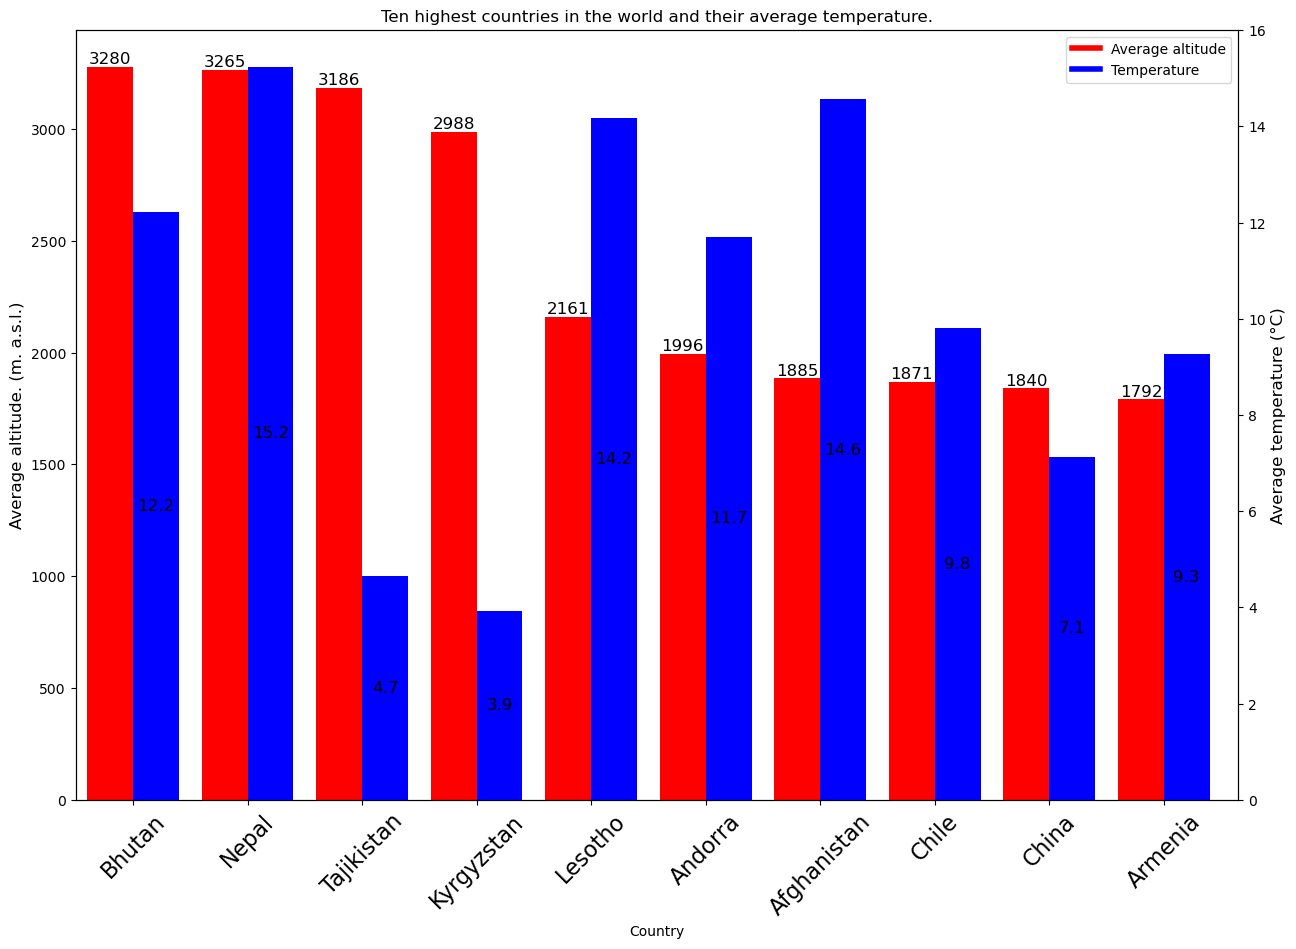

In [12]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot()
ax2 = ax1.twinx()

to_plot['mostMountainousCountries_avgMetersAboveSeaLevel'].plot(
    kind='bar', ax=ax1, position=1, width=0.4, color='red',
    title='Ten highest countries in the world and their average temperature.',
    xlabel='Country', rot=45,
)
to_plot['AverageTemperature'].plot(
    kind='bar', ax=ax2, position=0, width=0.4, color='blue'
)
ax1.bar_label(ax1.containers[0], fontsize=12)
ax1.set_ylabel('Average altitude. (m. a.s.l.)', fontsize=12)
ax2.bar_label(ax2.containers[0], fontsize=12, label_type='center', fmt= lambda number: f"{number:.1f}")
ax2.set_ylabel('Average temperature (°C)', fontsize=12)
ax1.tick_params(axis='x', labelsize=16)
ax1.set_xlim(left=-0.5)
ax1.legend(
     [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='blue', lw=4)],
    ['Average altitude', 'Temperature']
)
plt.show()

Let's do the same for top 10 countries whose largest part of the national territory is covered with mountains

In [13]:
to_plot = mountains[
              ['mostMountainousCountries_percCoverage', 'AverageTemperature']
          ].sort_values(
            'mostMountainousCountries_percCoverage', ascending=False
        ).iloc[:10]
to_plot

,mostMountainousCountries_percCoverage,AverageTemperature
country,,
Bhutan,98.8,12.214136
Tajikistan,91.9,4.663876
Kyrgyzstan,90.7,3.932933
Lesotho,90.5,14.178176
Montenegro,89.3,10.630087
Armenia,85.9,9.270176
North Macedonia,85.5,10.783492
Switzerland,83.6,7.529564
Lebanon,81.1,18.190404


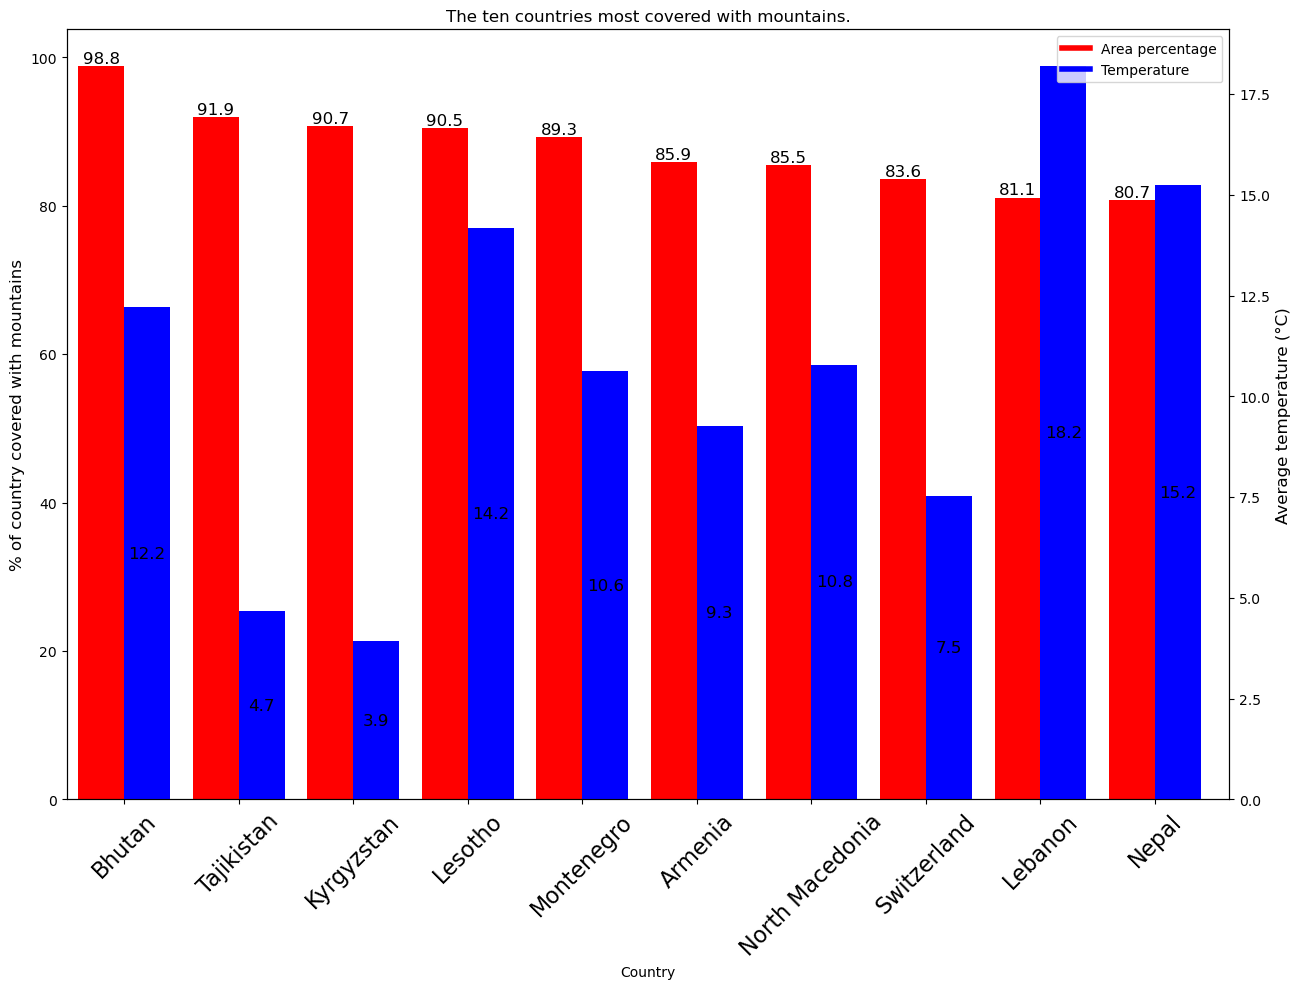

In [14]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure

ax1 = fig.add_subplot() # Create matplotlib axes
ax2 = ax1.twinx()

to_plot['mostMountainousCountries_percCoverage'].plot(
    kind='bar', ax=ax1, position=1, width=0.4, color='red',
    title='The ten countries most covered with mountains.',
    xlabel='Country', rot=45,
)
to_plot['AverageTemperature'].plot(
    kind='bar', ax=ax2, position=0, width=0.4, color='blue'
)
ax1.bar_label(ax1.containers[0], fontsize=12)
ax1.set_ylabel('% of country covered with mountains', fontsize=12)
ax2.bar_label(ax2.containers[0], fontsize=12, label_type='center', fmt= lambda number: f"{number:.1f}")
ax2.set_ylabel('Average temperature (°C)', fontsize=12)
ax1.tick_params(axis='x', labelsize=16)
ax1.set_xlim(left=-0.5, )
ax2.legend(
     [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='blue', lw=4)],
    ['Area percentage', 'Temperature'],
    loc='upper right'
)
plt.show()

## 2.2) Skiing Medals
Let's see what countries won the most skiing medals.

In [15]:
skiing_medals = get_medals_number(athletes, 'Alpine Skiing', 2000, 2024)
skiing_medals

,Medal
Country,
Austria,36
USA,17
Norway,12
Croatia,10
Switzerland,10
France,8
Sweden,8
Germany,7
Italy,6


Let's add to above dataframe information about average temperature. Then let's show on barplot what countries won the most ski medals and theirs average temperature.

In [16]:
temperatures.index = temperatures.index.str.replace('United States', 'USA')
skiing_medals = skiing_medals.join(temperatures)
skiing_medals

,Medal,AverageTemperature
Country,,
Austria,36,6.747699
USA,17,9.105489
Norway,12,0.593704
Croatia,10,11.810773
Switzerland,10,7.529564
France,8,13.293961
Sweden,8,2.926984
Germany,7,8.714190
Italy,6,13.223825


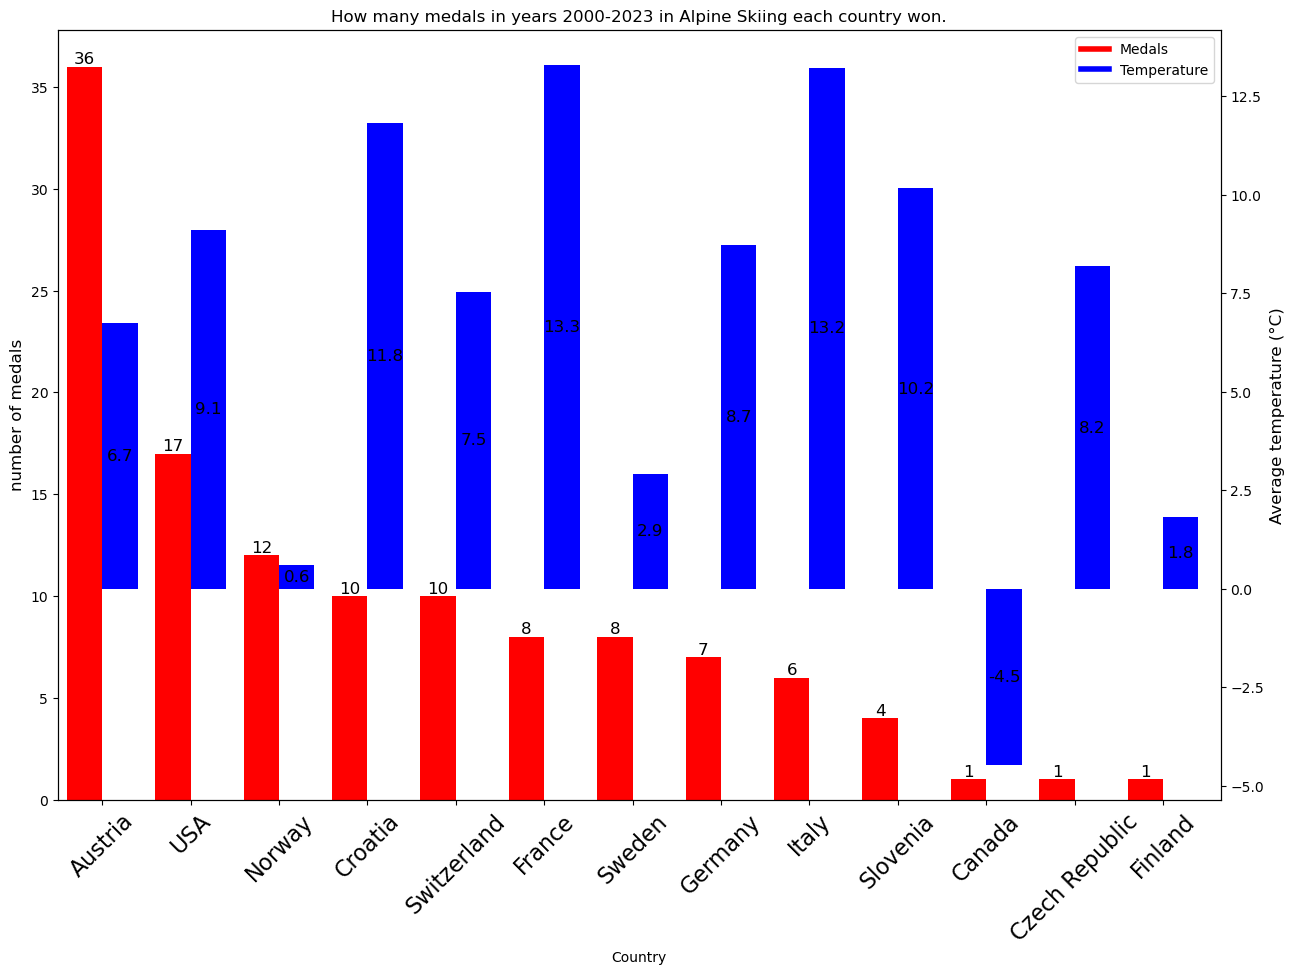

In [17]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure

ax1 = fig.add_subplot() # Create matplotlib axes
ax2 = ax1.twinx()

skiing_medals['Medal'].plot(
    kind='bar', ax=ax1, position=1, width=0.4, color='red',
    title='How many medals in years 2000-2023 in Alpine Skiing each country won.',
    xlabel='Country', rot=45,
)
skiing_medals['AverageTemperature'].plot(
    kind='bar', ax=ax2, position=0, width=0.4, color='blue'
)
ax1.bar_label(ax1.containers[0], fontsize=12)
ax1.set_ylabel('number of medals', fontsize=12)
ax2.bar_label(ax2.containers[0], fontsize=12, label_type='center', fmt= lambda number: f"{number:.1f}")
ax2.set_ylabel('Average temperature (°C)', fontsize=12)
ax1.tick_params(axis='x', labelsize=16)
ax1.set_xlim(left=-0.5)
ax1.legend(
     [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='blue', lw=4)],
    ['Medals', 'Temperature']
)
plt.show()

## 2.3) Sum up
In pretty every country form first two diagrams there is a lot of snow and mountains. Yes, there is snow in Afghanistan and even Lebano during winter! There are photos below. However, only Switzerland is both in top 10 most mountainous countries and in top 10 countries, who won the most ski medals. It means that number of won medals is more about culture and tradition of skiing, less about how many mountains and snow is in the country. Most France is flat, yet they won 8 olimpics medals.

## 2.4) Photos

#### Winter in Afghanistan
![Winter in Afghanistan](./img/afghanistan_winter.jpg)

#### Winter in Lesotho
![Winter in Afghanistan](./img/lesotho_winter.jpg)

#### Ski resorts in Chille
![Winter in Afghanistan](./img/chille_ski.jpg)

#### Winter in Nepal
![Winter in Afghanistan](./img/nepal_winter.jpg)

#### Winter in Bhutan
![Winter in Afghanistan](./img/bhutan_winter.jpg)

# 3) Bobsleigh and Money

If you don't know what bobsleigh is, below is a photo.
![Bobsleigh](img/bobsleigh.jpg)

Bobsleigh is considered one of the most expensive sports in the world. So, probably the most medals in this sport is won by the richest countries. Citizens of other countries simply may not be able to afford to do this sport. Is it true? Let's check it.

Firstly, we need income by country for each world country. Such data can be found [here](https://wisevoter.com/country-rankings/median-income-by-country/). Let's read the file int dataframe and take a look on what is inside.

In [18]:
money_df = pd.read_csv('./csv/median_income_per_country.csv', index_col='id')
money_df.tail()

,country,median_income_per_day
id,,
158,Somalia,1.52
159,South Sudan,1.52
160,Democratic Republic of the Congo,1.46
161,Uzbekistan,1.23
162,Madagascar,1.12


In money_df there is median daily brutto income per day in USA dollars for different countries. Let's set country name as an index, it will make things easier.

In [19]:
money_df = money_df.set_index('country')
money_df.index = money_df.index.str.replace('United Kingdom', 'UK')
money_df.index = money_df.index.str.replace('United States of America', 'USA')
money_df.head()

,median_income_per_day
country,
Luxembourg,69.48
Norway,65.30
United Arab Emirates,65.14
USA,65.04
Switzerland,64.35


Now we have a list of median incomes in different countries.  What values are in this list?

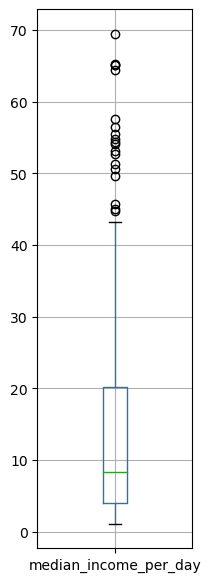

In [88]:
money_df.boxplot('median_income_per_day', figsize=(2,7))
plt.show()

In [20]:
money_df['median_income_per_day'].describe()

count    162.000000
mean      16.092531
std       17.421210
min        1.120000
25%        3.962500
50%        8.375000
75%       20.160000
max       69.480000
Name: median_income_per_day, dtype: float64

We know that:
1) The richest country is Luxembourg with median daily income equal to 69.38 .
2) 75% of countries has median income lower than 20.16 .
3) 50% of countries has median daily income lower than 8.375 .
4) 25% of countries has median income lower than 3.9625 .
5) The poorest countries in the world is Madagascar with meian daily income equal to 1.12 .

Of course, the daily income is in USA dollars.
Now, let's show on barplot countries which won the most medals in Bobsleigh and their median income.

In [21]:
bobsleigh_medals = get_medals_number(athletes, 'Bobsleigh', 1800, 2024)
bobsleigh_medals = bobsleigh_medals.join(money_df)
bobsleigh_medals

,Medal,median_income_per_day
Country,,
Germany,117,54.82
Switzerland,92,64.35
USA,74,65.04
Italy,32,40.67
Russia,20,17.41
Canada,18,55.42
UK,14,45.00
Austria,12,57.64
Belgium,9,52.63


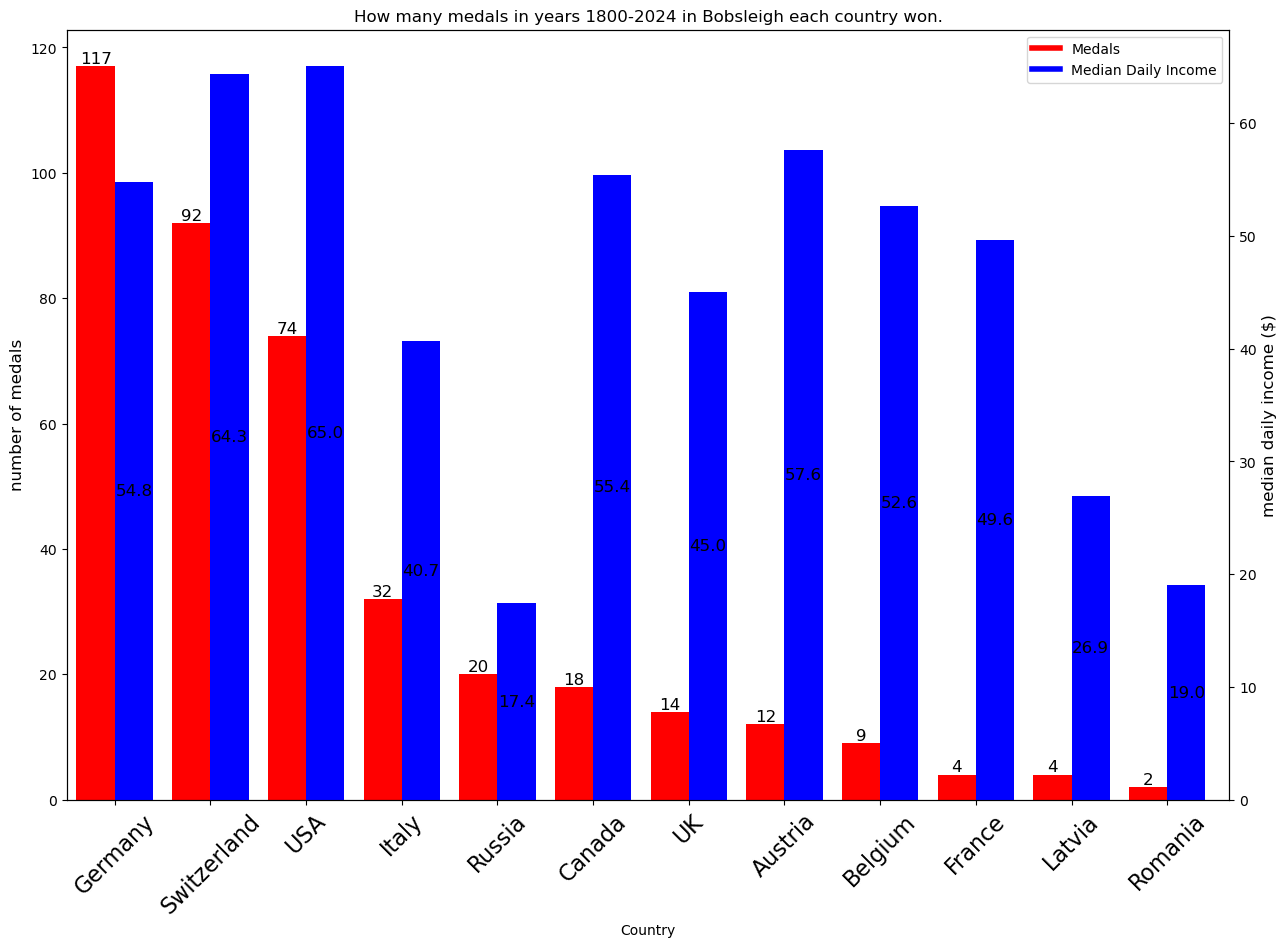

In [22]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure

ax1 = fig.add_subplot() # Create matplotlib axes
ax2 = ax1.twinx()

bobsleigh_medals['Medal'].plot(
    kind='bar', ax=ax1, position=1, width=0.4, color='red',
    title='How many medals in years 1800-2024 in Bobsleigh each country won.',
    xlabel='Country', rot=45,
)
bobsleigh_medals['median_income_per_day'].plot(
    kind='bar', ax=ax2, position=0, width=0.4, color='blue'
)
ax1.bar_label(ax1.containers[0], fontsize=12)
ax1.set_ylabel('number of medals', fontsize=12)
ax2.bar_label(ax2.containers[0], fontsize=12, label_type='center', fmt= lambda number: f"{number:.1f}")
ax2.set_ylabel('median daily income ($)', fontsize=12)
ax1.tick_params(axis='x', labelsize=16)
ax1.set_xlim(left=-0.5)
ax1.legend(
     [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='blue', lw=4)],
    ['Medals', 'Median Daily Income']
)
plt.show()

As we can see almost each country on the diagram has median daily income way higher than 75 quantil. So, we confirmed that the country with the most won medals in Bobsleigh are the richest countries.

# 4) How many medals austria won over time?

Let's plot how many medals Austria won over time.

In [77]:
athletes_austria = athletes.loc[(athletes['NOC'] == 'AUT') & (athletes['Medal'] != 'None'), ['Year', 'Medal']]
athletes_austria = athletes_austria.groupby('Year').count()
athletes_austria = pd.DataFrame(data=athletes_austria, index= list(range(1896, 2020, 4)))
athletes_austria = athletes_austria.fillna(0.0)
athletes_austria = athletes_austria.astype({'Medal': int})
athletes_austria

,Medal
1896,5
1900,6
1904,4
1908,1
1912,14
1916,0
1920,0
1924,8
1928,11
1932,7


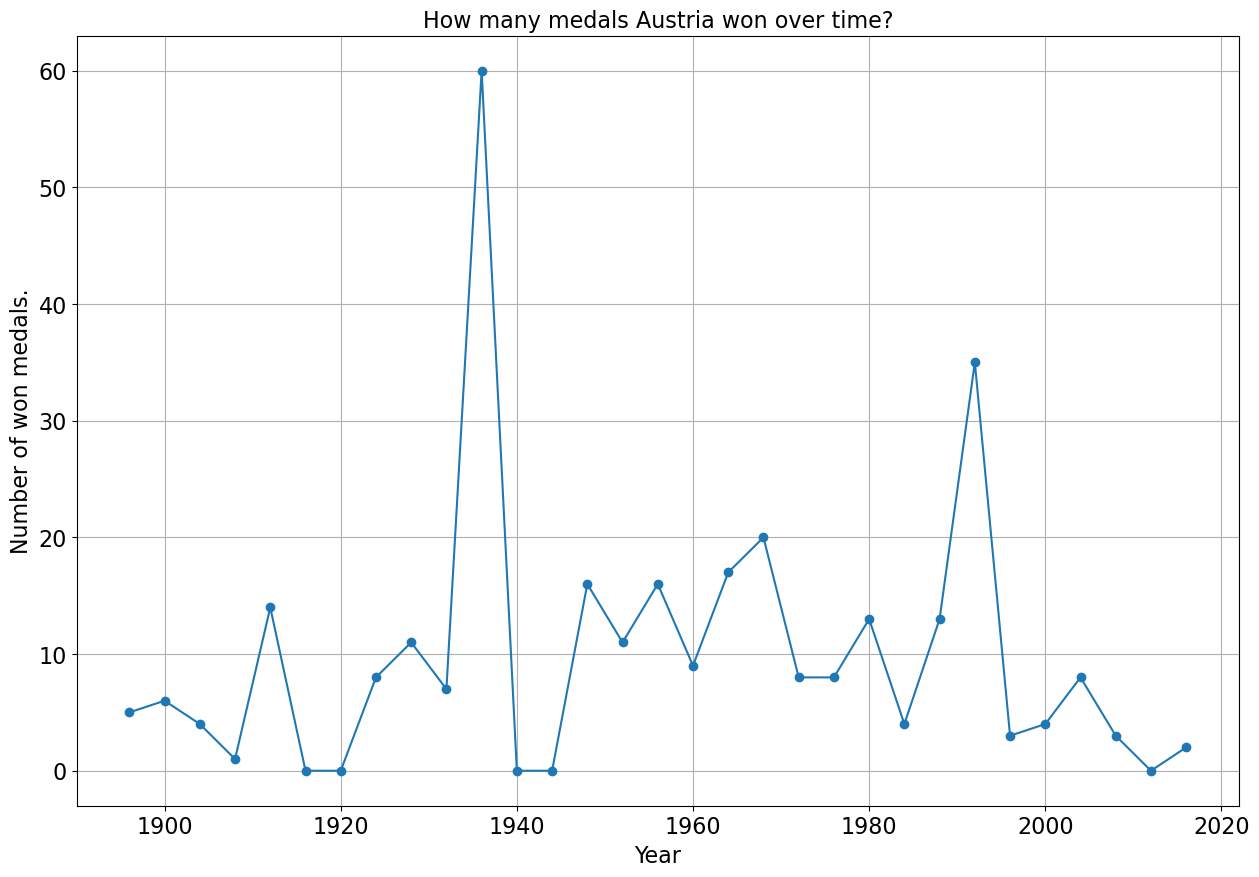

In [78]:
ax = athletes_austria['Medal'].plot(
    figsize=(15,10), marker='o', fontsize=16
)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of won medals.', fontsize=16)
ax.grid(visible=True, which='both')
plt.title("How many medals Austria won over time?", fontsize=16)
plt.show()